# Ali Asghar
# Rehman
# Usama Aziz

#  predicts the GO term for a protein based on its sequence or features.
Classifying Proteins via Amino Acid Composition..............
Predicting Protein Functions using AAC...............
Protein Function Prediction...................

# Code to Generate a FASTA File



In [ ]:
import random

csv_file = "processed_mappings.csv"

fasta_file = "protein_sequences.fasta"

def generate_random_sequence(length=50): 
    amino_acids = "ACDEFGHIKLMNPQRSTVWY" 
    return "".join(random.choices(amino_acids, k=length))

def create_fasta_from_csv(csv_path, fasta_path):
    fasta_entries = []
    with open(csv_path, "r") as file:
        next(file) 
        for line in file:
            protein_id, go_terms = line.strip().split(",")
            sequence = generate_random_sequence()
            fasta_entries.append(f">{protein_id} {go_terms}\n{sequence}\n") 
    
    with open(fasta_path, "w") as fasta_file:
        fasta_file.writelines(fasta_entries)#

create_fasta_from_csv(csv_file, fasta_file)
print(f"FASTA file generated: {fasta_file}")


FASTA file generated: protein_sequences.fasta


## 1. GO Term Distribution Plot:
This plot will show how many protein sequences are associated with each GO term.

C:\Users\Ali\AppData\Local\Temp\ipykernel_3688\1947485524.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


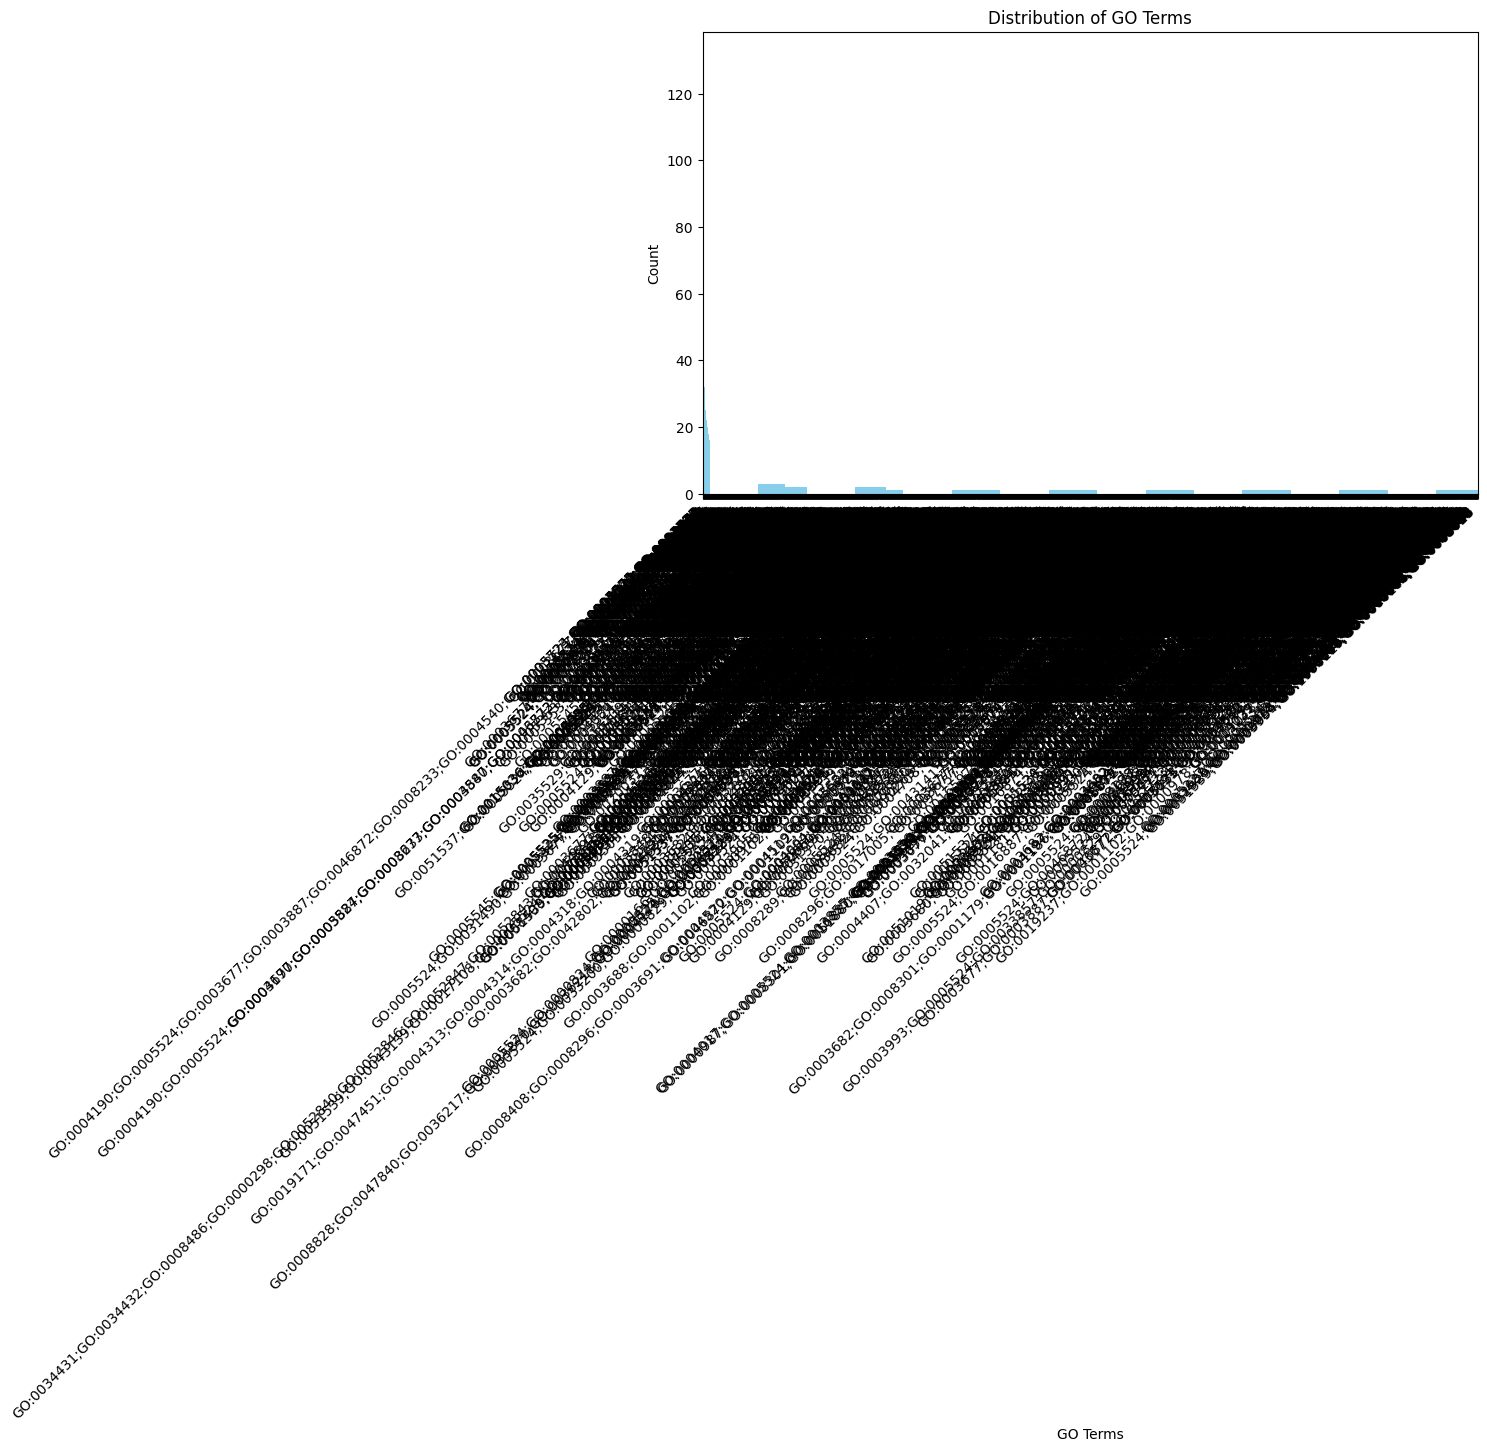

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(csv_file)

go_term_counts = df['GO_Terms'].value_counts()

plt.figure(figsize=(10, 6))
go_term_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of GO Terms')
plt.xlabel('GO Terms')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## . Protein Sequence Length Distribution:
You can visualize the distribution of protein sequence lengths if you are interested in the variations across the generated sequences.



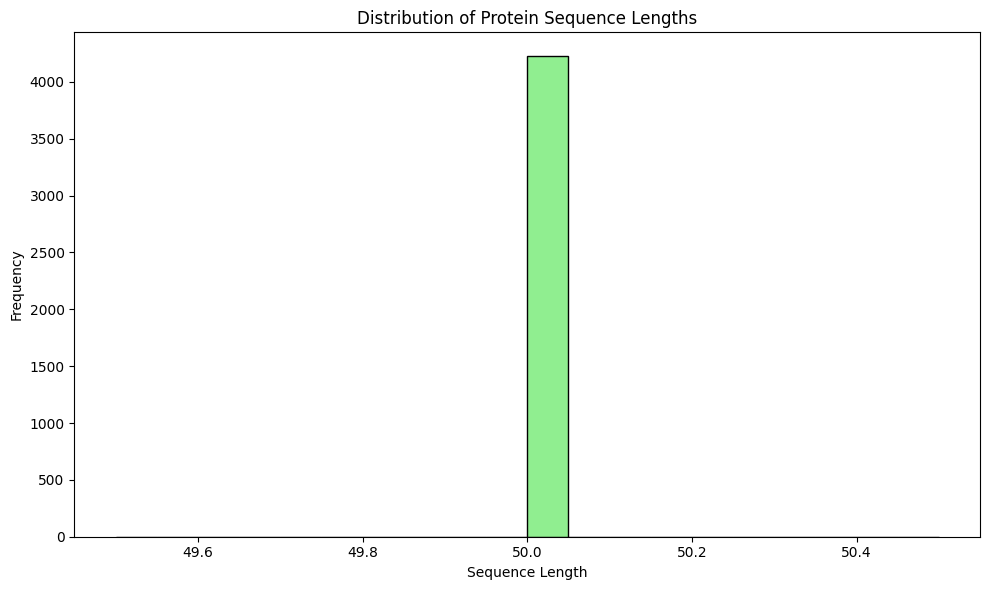

In [ ]:
def get_sequence_length(fasta_path):
    lengths = []
    with open(fasta_path, "r") as file:
        for line in file:
            if not line.startswith(">"):  
                lengths.append(len(line.strip()))
    return lengths

sequence_lengths = get_sequence_length(fasta_file)

plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Protein Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


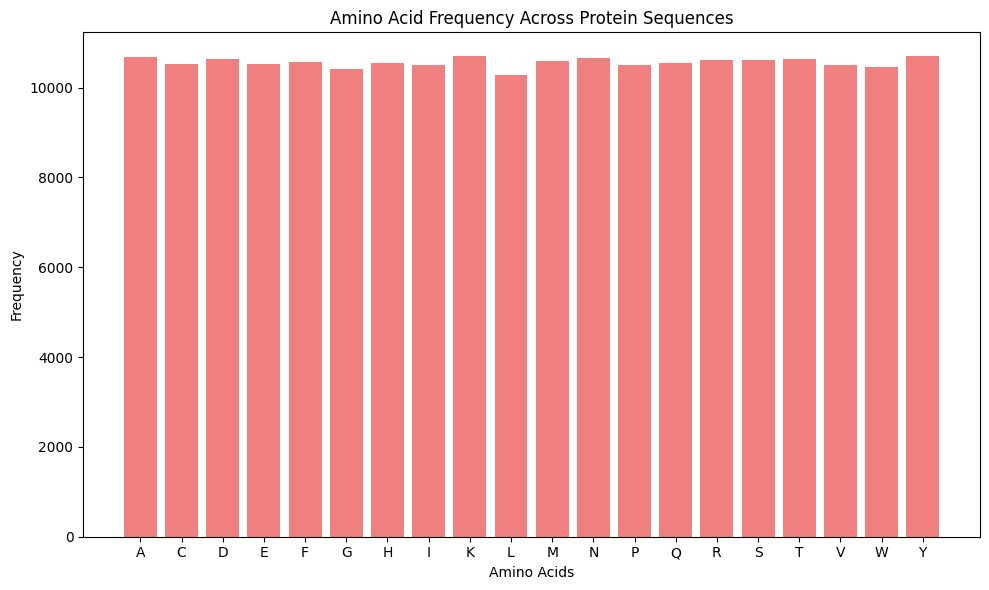

In [ ]:
amino_acids = "ACDEFGHIKLMNPQRSTVWY"
amino_acid_counts = {aa: 0 for aa in amino_acids}

with open(fasta_file, "r") as file:
    for line in file:
        if not line.startswith(">"):  
            for aa in line.strip():
                if aa in amino_acid_counts:
                    amino_acid_counts[aa] += 1

plt.figure(figsize=(10, 6))
plt.bar(amino_acid_counts.keys(), amino_acid_counts.values(), color='lightcoral')
plt.title('Amino Acid Frequency Across Protein Sequences')
plt.xlabel('Amino Acids')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Feature Extraction (AAC Example)


In [2]:
from collections import Counter
import pandas as pd

# Input FASTA file
fasta_file = "protein_sequences.fasta"

def parse_fasta(file_path):
    sequences = {}
    with open(file_path, "r") as file:
        protein_id = None
        for line in file:
            line = line.strip()
            if line.startswith(">"):
                protein_id = line.split()[0][1:] 
                sequences[protein_id] = ""
            else:
                sequences[protein_id] += line  
    return sequences

def calculate_aac(sequence):
    amino_acids = "ACDEFGHIKLMNPQRSTVWY"
    total_length = len(sequence)
    counts = Counter(sequence)
    return [counts[aa] / total_length for aa in amino_acids]

sequences = parse_fasta(fasta_file)
aac_features = []

for protein_id, sequence in sequences.items():
    features = calculate_aac(sequence)
    aac_features.append([protein_id] + features)

columns = ["Protein_ID"] + list("ACDEFGHIKLMNPQRSTVWY")
aac_df = pd.DataFrame(aac_features, columns=columns)

aac_df.to_csv("aac_features.csv", index=False)
print("AAC features saved to aac_features.csv!")


AAC features saved to aac_features.csv!


# Heatmap of AAC for All Proteins
A heatmap is a great way to visualize how each protein's AAC compares across different amino acids. This plot will allow you to see which amino acids are more or less common in the dataset.

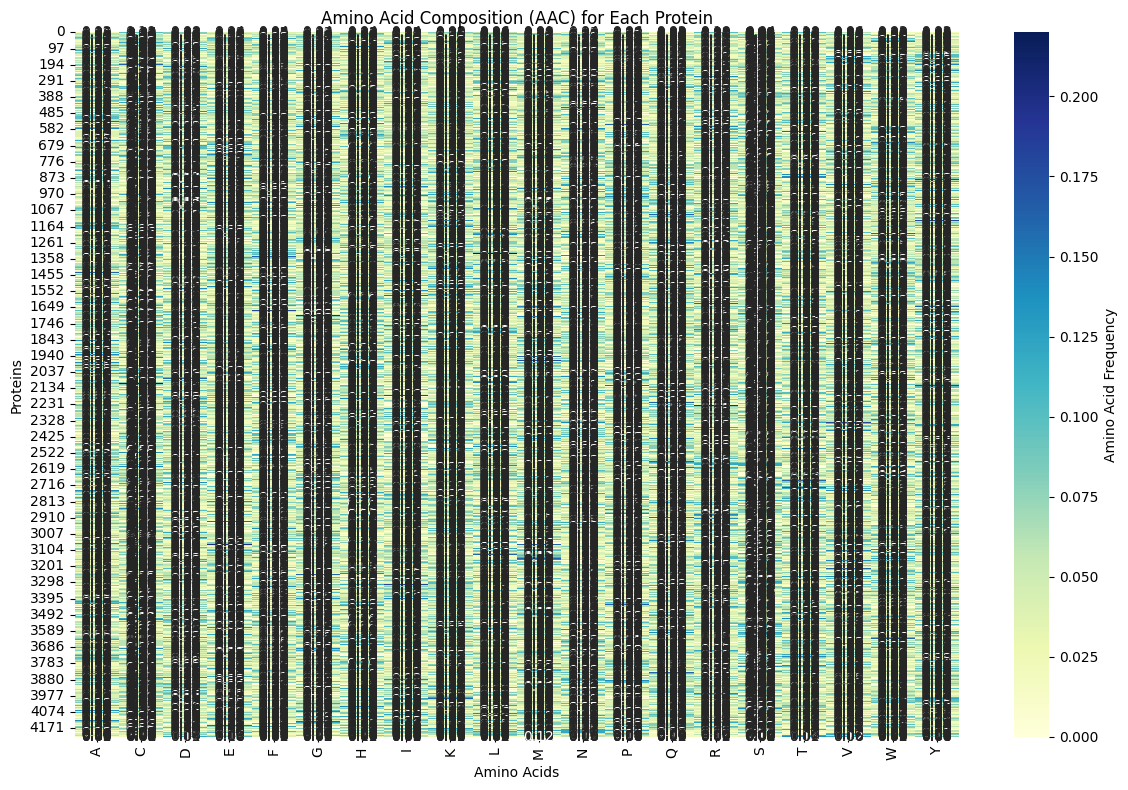

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(aac_df.drop("Protein_ID", axis=1), cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': 'Amino Acid Frequency'})
plt.title('Amino Acid Composition (AAC) for Each Protein')
plt.xlabel('Amino Acids')
plt.ylabel('Proteins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Bar Plot of Average AAC for Each Amino Acid
This plot shows the average frequency of each amino acid across all proteins. It can be helpful to understand which amino acids are most prevalent in your dataset.

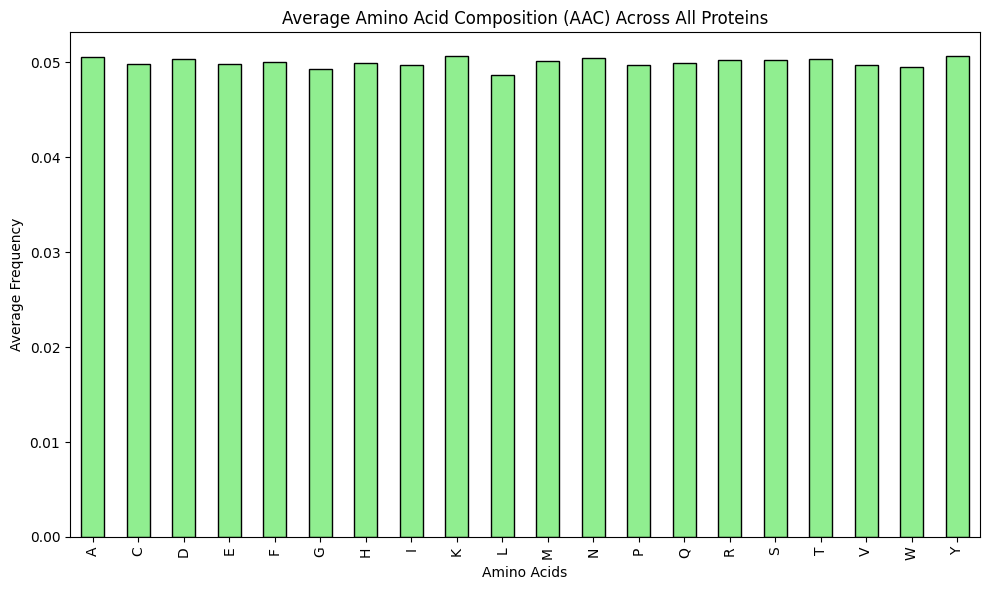

In [8]:
avg_aac = aac_df.drop("Protein_ID", axis=1).mean()

plt.figure(figsize=(10, 6))
avg_aac.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Amino Acid Composition (AAC) Across All Proteins')
plt.xlabel('Amino Acids')
plt.ylabel('Average Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#  Distribution of a Specific Amino Acid
If you're interested in the distribution of a specific amino acid (e.g., "A" for Alanine), you can plot its frequency across all proteins.

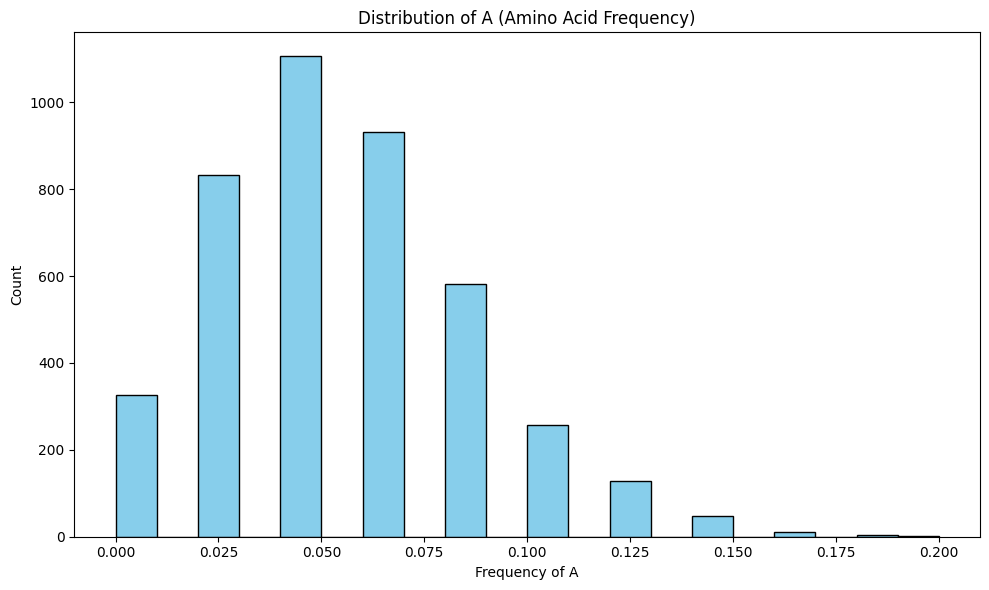

In [9]:
amino_acid = 'A'  
plt.figure(figsize=(10, 6))
plt.hist(aac_df[amino_acid], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Distribution of {amino_acid} (Amino Acid Frequency)')
plt.xlabel(f'Frequency of {amino_acid}')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# Pairwise Correlation Heatmap
You can visualize how amino acids correlate with each other in terms of their frequency across different proteins. This can show which amino acids tend to appear together more frequently.

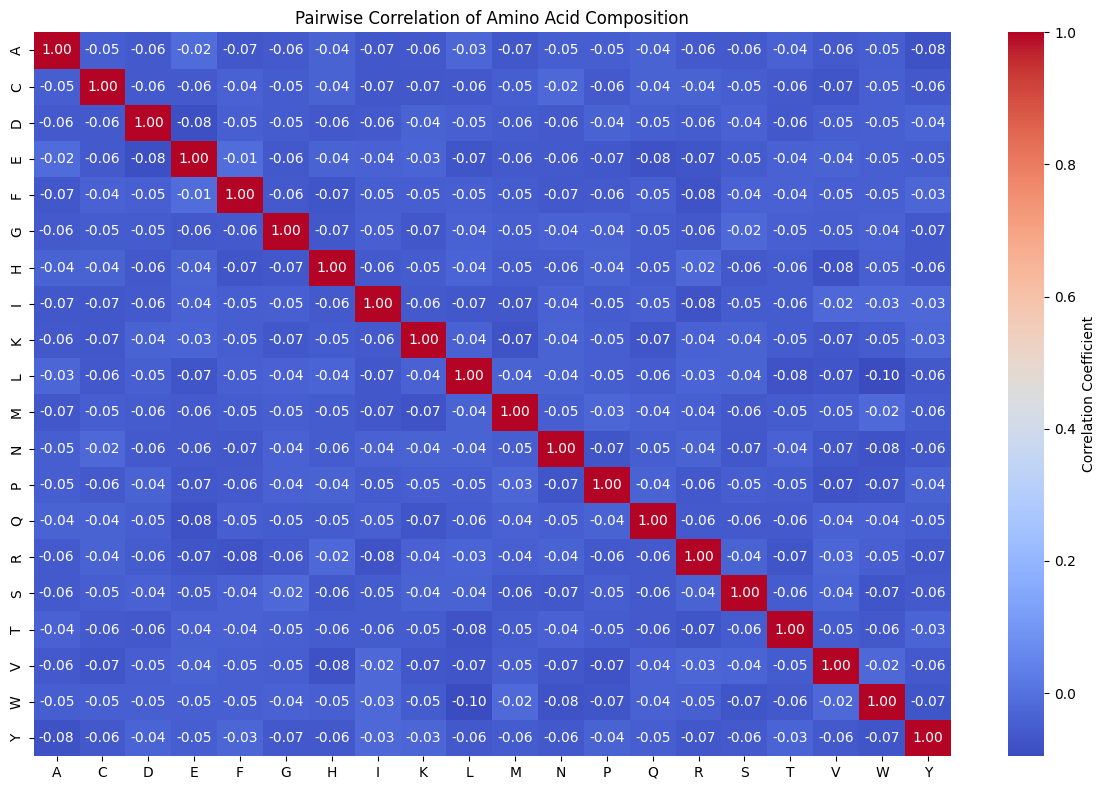

In [10]:
corr_matrix = aac_df.drop("Protein_ID", axis=1).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Pairwise Correlation of Amino Acid Composition')
plt.tight_layout()
plt.show()


# Principal Component Analysis (PCA) Plot
PCA can help reduce the dimensionality of the AAC data to 2D or 3D for visualization. This can help you see how proteins group based on their AAC.

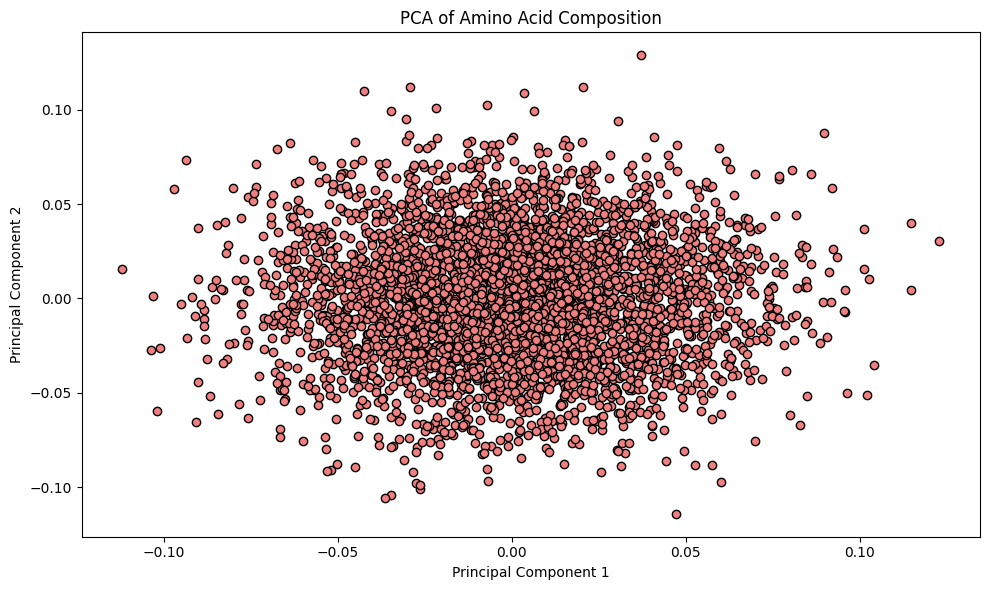

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(aac_df.drop("Protein_ID", axis=1))

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='lightcoral', edgecolors='black')
plt.title('PCA of Amino Acid Composition')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()


# Model Training and Evaluation

Test Accuracy: 0.93

Classification Report:
                                                                                                               precision    recall  f1-score   support

                                                                                        GO:0000166;GO:0003723       0.81      0.95      0.88        22
                                                                                                   GO:0003677       0.96      0.92      0.94        25
                                                                             GO:0003677;GO:0000981;GO:0008270       0.90      1.00      0.95        27
                                                                                                   GO:0003682       0.89      0.96      0.93        26
                                                                                        GO:0003682;GO:0003677       0.95      1.00      0.97        37
                                                 

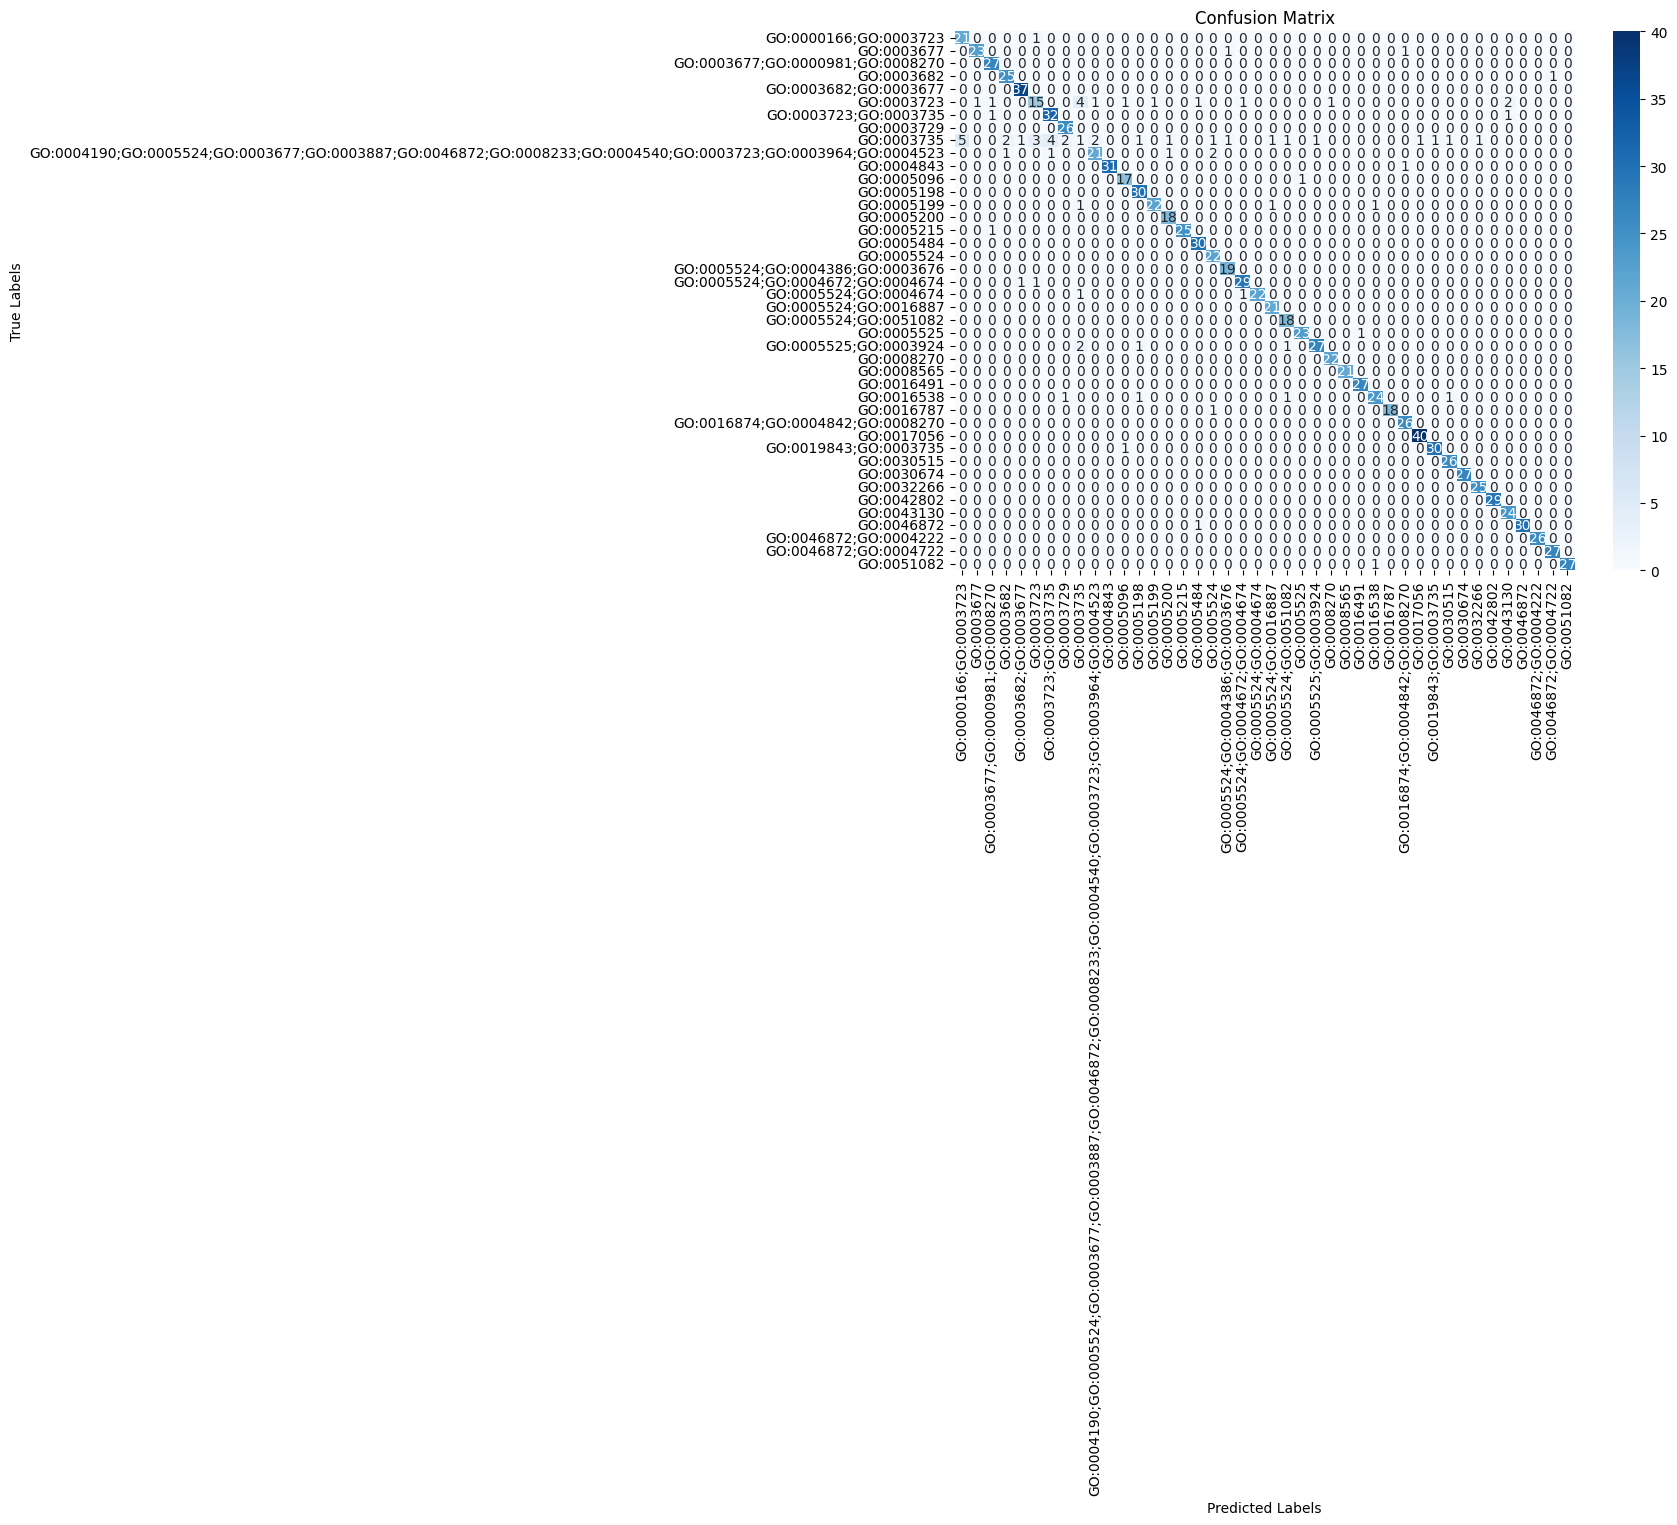

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

features_file = "aac_features.csv"
labels_file = "processed_mappings.csv"

# Load feature data
aac_df = pd.read_csv(features_file)

labels_df = pd.read_csv(labels_file)
data = aac_df.merge(labels_df, on="Protein_ID")

filtered_data = data.groupby("GO_Terms").filter(lambda x: len(x) >= 10)

X = filtered_data.iloc[:, 1:-1]  # All AAC columns
y = filtered_data["GO_Terms"]    # GO_Terms column

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

# Train accuracy
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Test accuracy
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Feature Importance
Visualizing the feature importance in Random Forest can show you which features have the most impact on the predictions.

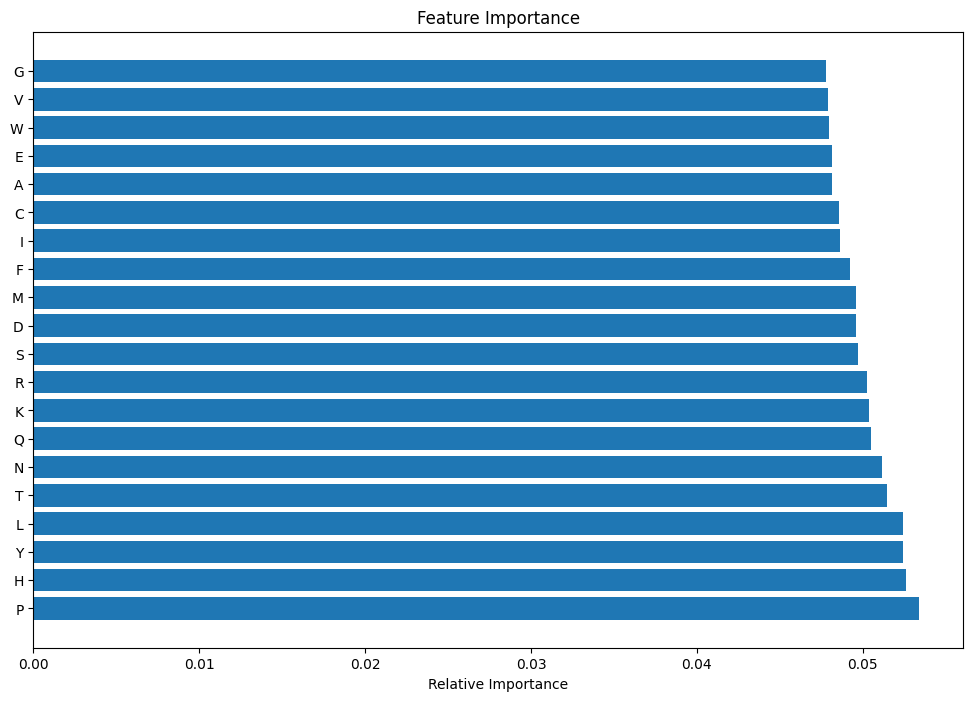

In [13]:
# Feature Importance Plot
importances = clf.feature_importances_ 
indices = importances.argsort()[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


# Accuracy per Class
A bar plot showing the performance (accuracy, precision, recall, and F1 score) for each class.

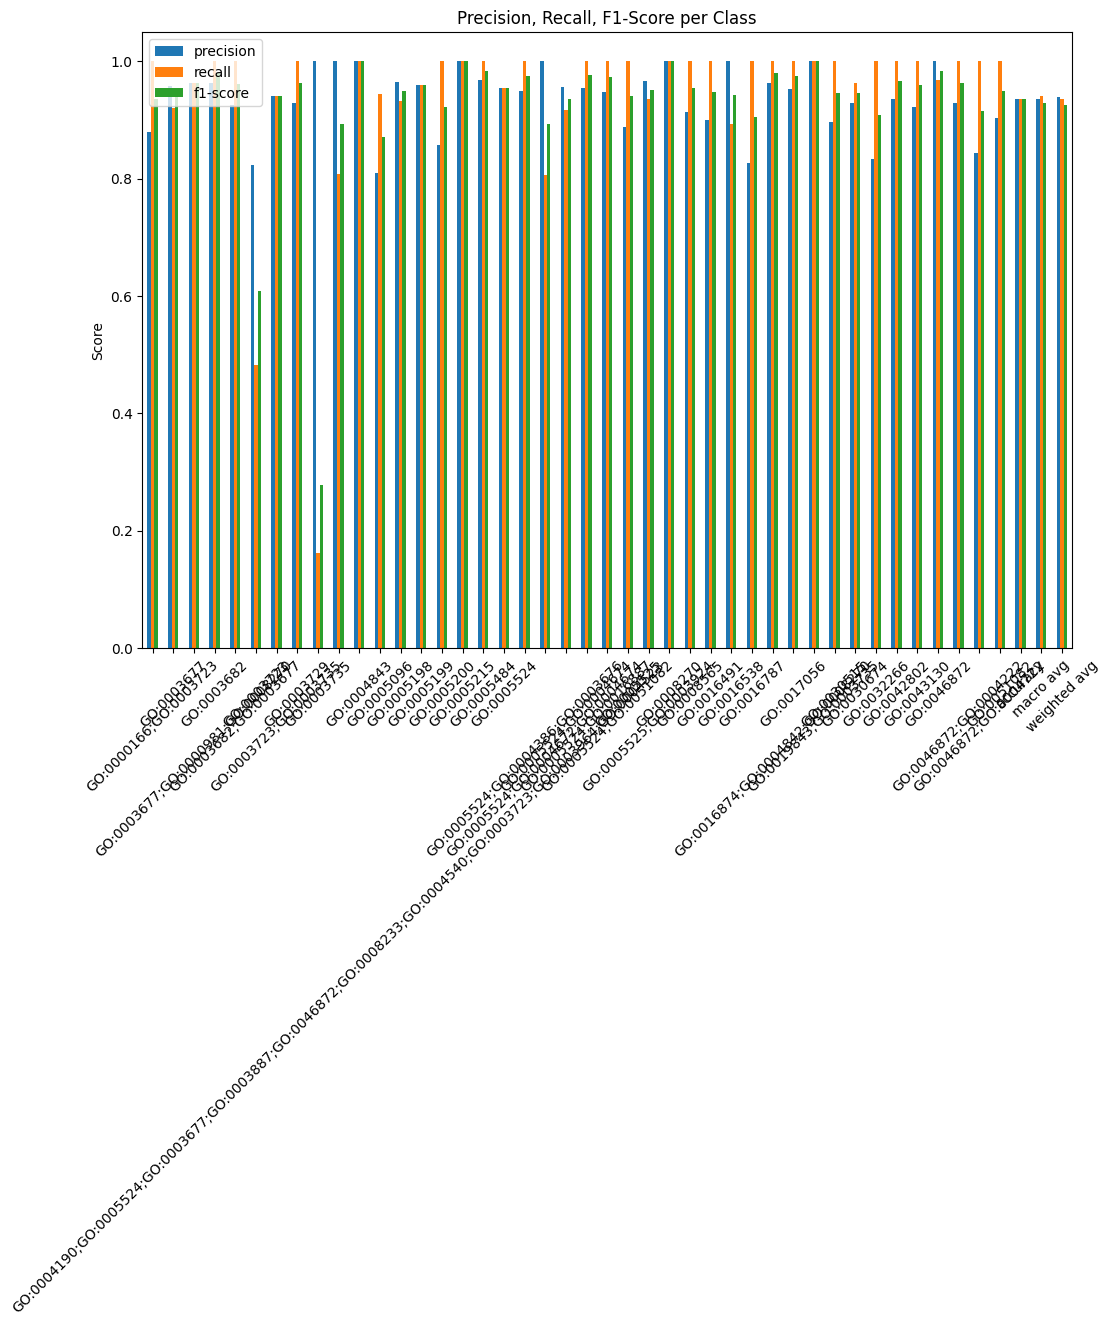

In [15]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_, output_dict=True)

class_report_df = pd.DataFrame(report).transpose()

class_report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 8))
plt.title("Precision, Recall, F1-Score per Class")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()
